## Load Data

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df = pd.read_excel('m5.xlsx',sheet_name= 2)

In [35]:
type(df)
df.head()

,MPG,Horsepower,Weight
0,43.1,48,1985
1,19.9,110,3365
2,19.2,105,3535
3,17.7,165,3445
4,18.1,139,3205


In [36]:
df.isna().sum()

MPG           0
Horsepower    0
Weight        0
dtype: int64

In [37]:
df.describe()

,MPG,Horsepower,Weight
count,50.000000,50.00000,50.000000
mean,28.542000,90.84000,2756.520000
std,8.171431,27.25867,635.050994
min,15.500000,48.00000,1755.000000
25%,20.825000,68.50000,2211.250000
50%,27.750000,85.00000,2699.000000
75%,34.625000,104.50000,3235.000000
max,46.600000,165.00000,4360.000000


##### We assume null hypothesis such that there is no relation between input variables and output variables which is that the beta coefficients is equal to zero.
##### Alternate hypothesis is that there is relation between input and output variable so that the beta coefficients are not zero

## Exploratory Data Analysis

In [38]:
df.corr()

,MPG,Horsepower,Weight
MPG,1.000000,-0.788177,-0.824809
Horsepower,-0.788177,1.000000,0.741874
Weight,-0.824809,0.741874,1.000000


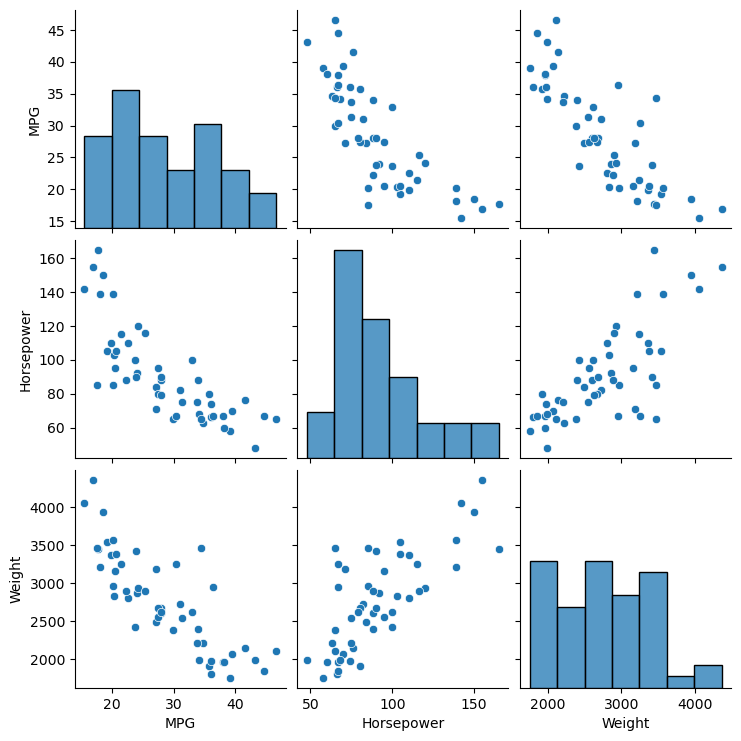

In [39]:
sns.pairplot(df)

## Split data

In [40]:
X = df.drop(['MPG'],axis=1)
Y = df['MPG']

In [41]:
X.head()

,Horsepower,Weight
0,48,1985
1,110,3365
2,105,3535
3,165,3445
4,139,3205


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Modeling

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

#### Intercept and Beta coefficient

In [44]:
print(model.intercept_)
print(model.coef_)

58.43186650914114
[-0.05387825 -0.00911359]


## Predictions

In [45]:
test_pred = model.predict(X_test)
test_pred

array([30.98914614, 25.75256943, 27.93692385, 27.35229627, 27.36462311,
       23.35117981, 33.2394285 , 22.41433534, 34.24995689, 24.56004632,
       35.70009869, 21.73372381, 37.26362016, 13.83464839, 18.14562701])

## Evaluation

In [46]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
print("MAE: ",mean_absolute_error(test_pred,y_test))
print("MSE: ",mean_squared_error(test_pred,y_test))
print("RSME: ",np.sqrt(mean_absolute_error(test_pred,y_test)))
print("R_score: ",r2_score(test_pred,y_test))
print("model score: ",model.score(X_test,y_test))

MAE:  4.165774083611489
MSE:  29.97540982944795
RSME:  2.0410228033051196
R_score:  0.2638693593823238
model score:  0.5898788322070099


## Checking for Assumptions

## Linearity of error

In [48]:
res = y_test - test_pred
res

13    -7.289146
39    -0.352569
30     8.463076
45    -5.052296
17    -3.364623
48    11.048820
26    -3.339429
25     1.485665
32    -0.549957
19    -4.060046
12    10.899901
4     -3.633724
37     0.836380
8      1.665352
3     -0.445627
Name: MPG, dtype: float64

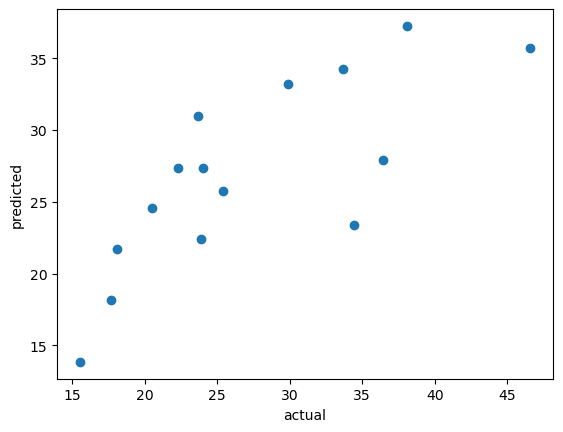

In [49]:
plt.scatter(y_test,test_pred)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Normality of error

<function matplotlib.pyplot.show(close=None, block=None)>

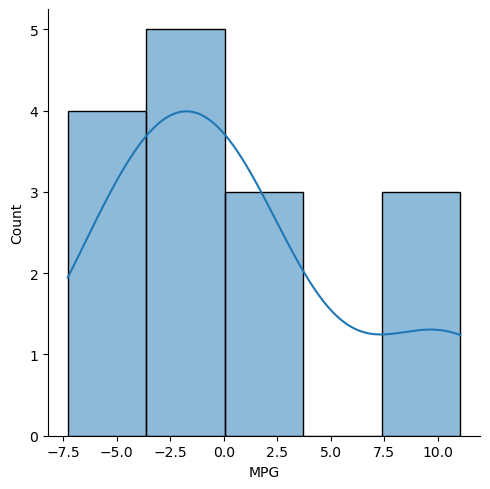

In [50]:
sns.displot(res,kde=True)
plt.show

## Equality of varience

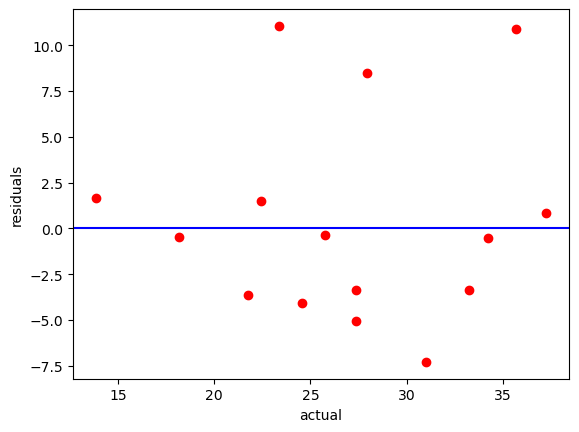

In [51]:
plt.scatter(test_pred,res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel('actual')
plt.ylabel('residuals')
plt.show()

## varibles significance

In [63]:
import statsmodels.api as smf

model2 = smf.OLS(Y,X)
results = model2.fit()
# Access the summary information
summary = results.summary()

# Print the summary
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.792
Model:                            OLS   Adj. R-squared (uncentered):              0.783
Method:                 Least Squares   F-statistic:                              91.18
Date:                Sat, 20 May 2023   Prob (F-statistic):                    4.49e-17
Time:                        21:00:18   Log-Likelihood:                         -201.24
No. Observations:                  50   AIC:                                      406.5
Df Residuals:                      48   BIC:                                      410.3
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## Inference
##### Since is the p-value is greater than 0.05 for horsepower we can say that the null hypothesis can be rejected and there is no significant evidence that beta coefficient of horsepower is not zero.


## Covarience between the features 

In [65]:
model3 = smf.OLS(df['Horsepower'],df['Weight'])
results2 = model3.fit()

# Access the summary information
summary2 = results2.summary()

print(summary2)

                                 OLS Regression Results                                
Dep. Variable:             Horsepower   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              1293.
Date:                Sat, 20 May 2023   Prob (F-statistic):                    6.94e-37
Time:                        21:02:00   Log-Likelihood:                         -215.76
No. Observations:                  50   AIC:                                      433.5
Df Residuals:                      49   BIC:                                      435.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### R-square value

In [71]:
r_sq_hp = results2.rsquared
r_sq_hp

0.9634894182023142

## Varience Inflation Factor

In [72]:
vif_hp = 1/1-r_sq_hp
vif_hp

0.03651058179768585

Since the vif value of horse power is less than 4 we can say that weight is not being influenced by horsepower so we can keep both the features.